In [2]:
#%matplotlib inline 
# For inline plotting, commands in cells below the cell that outputs a plot will not affect the plot
import numpy as np # For all mathematical calculations
#import cv2 as cv # For image base transformations
import matplotlib.pyplot as plt #For plotting the output
import tensorflow as tf
from tensorflow.python import keras
#from tensorflow.keras.datasets import cifar10,mnist



In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("x_train: ", x_train.shape)
K = len(np.unique(y_train)) # Classes

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
std=1e-5
w1 = std*np.random.randn(Din, K) 
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

iterations =300
lr =1.4e-2
in_ir=lr
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0


x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)


In [ ]:
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]
    y_pred=x.dot(w1)+b1
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w1*w1))
    loss_history.append(loss)
    if t%10 ==0:
        print("iteration %d / %d: less %f "%(t,iterations,loss))

    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred)+reg*w1
    db1=dy_pred.sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

print("final loss",loss)


# Forward pass

# Backward pass
# Printing accuracies and displaying w as images

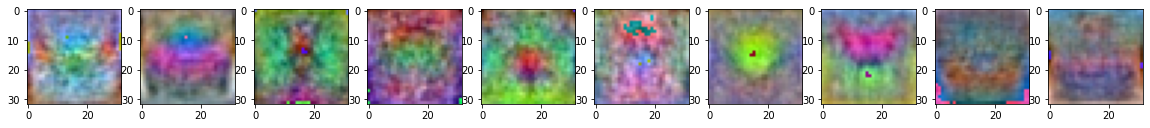

In [8]:
fig,ax=plt.subplots(1,10,figsize=(20,20))

for i in range(10):
    clss=w1[:,i].reshape(32,32,3)
    final=255/(clss.max()-clss.min())*clss+255/(clss.max()-clss.min())*clss.min()
    
    ax[i].imshow(final.astype(np.uint8))
plt.show()


In [9]:
print("initial learning rate:",in_ir)


#loss for test data
print("training loss:",loss)

batch_size_test=Nte
indices = np.arange(Nte)
xt=x_test[indices]
yt=y_test[indices]
yt_pred=xt.dot(w1)+b1
loss_t=1./batch_size_test*np.square(yt_pred-yt).sum()+reg*(np.sum(w1*w1))
print("test_data loss:",loss_t)

#accuracies

test_accuracy = 0
train_accuracy = 0
for y_1,y_2 in zip(yt,yt_pred):
    if np.where(y_1 == y_1.max()) == np.where(y_2 == y_2.max()):
        test_accuracy+=1

for y_1,y_2 in zip(y,y_pred):
    if np.where(y_1 == y_1.max()) == np.where(y_2 == y_2.max()):
       train_accuracy+=1

train_accuracy=train_accuracy/Ntr*100
test_accuracy=test_accuracy/Nte*100

print("train accuracy is:",str(train_accuracy)+"%")
print("test accuracy is:",str(test_accuracy)+"%")


initial learning rate: 0.014
training loss: 0.7829011578121524
test_data loss: 0.7876048610667145
train accuracy is: 41.942%
test accuracy is: 40.58%


In [ ]:
#QUESTION 2

In [4]:
x_train_new,x_test_new=x_train*255,x_test*255
H=200
std=1e-6
w1=std*np.random.randn(Din,H)
w2=std*np.random.randn(H,K)
b1=np.zeros(H)
b2=np.zeros(K)
batch_size=Ntr

iterations =300
lr =1.4e-2
in_lr=lr
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train_new[indices]
    y=y_train[indices]
    h=1.0/(1.+np.exp(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))
    loss_history.append(loss)
    if t%10 ==0:
        print("iteration %d / %d: less %f "%(t,iterations,loss))
    
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h))+reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    w2-=lr*dw2
    b2-=lr*db2
    lr*=lr_decay

print("initial learning rate:",in_lr)
print("train loss is:",loss)

    

iteration 0 / 300: less 1.000003 
iteration 10 / 300: less 0.925967 
iteration 20 / 300: less 0.850546 
iteration 30 / 300: less 0.833644 
iteration 40 / 300: less 0.826552 
iteration 50 / 300: less 0.818986 
iteration 60 / 300: less 0.815541 
iteration 70 / 300: less 0.802904 
iteration 80 / 300: less 0.794185 
iteration 90 / 300: less 0.795244 
iteration 100 / 300: less 0.790656 
iteration 110 / 300: less 0.778160 
iteration 120 / 300: less 0.780953 
iteration 130 / 300: less 0.774749 
iteration 140 / 300: less 0.770838 
iteration 150 / 300: less 0.780544 
iteration 160 / 300: less 0.758049 
iteration 170 / 300: less 0.761692 
iteration 180 / 300: less 0.764796 
iteration 190 / 300: less 0.760993 
iteration 200 / 300: less 0.759123 
iteration 210 / 300: less 0.759538 
iteration 220 / 300: less 0.746623 
iteration 230 / 300: less 0.749419 
iteration 240 / 300: less 0.746116 
iteration 250 / 300: less 0.747227 
iteration 260 / 300: less 0.746863 
iteration 270 / 300: less 0.749130 
ite

In [8]:
#test loss
batch_size_test=Nte
indices = np.arange(Nte)
xt=x_test_new[indices]
yt=y_test[indices]
ht=1.0/(1.+np.exp(-(xt.dot(w1)+b1)))
yt_pred=ht.dot(w2)+b2
loss_t=1./batch_size_test*np.square(yt_pred-yt).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))

print("test_data loss:",loss_t)

#acuracies
test_accuracy = 0
train_accuracy = 0
for y_1,y_2 in zip(yt,yt_pred):
    if np.where(y_1 == y_1.max()) == np.where(y_2 == y_2.max()):
        test_accuracy+=1

for y_1,y_2 in zip(y,y_pred):
    if np.where(y_1 == y_1.max()) == np.where(y_2 == y_2.max()):
       train_accuracy+=1

train_accuracy=train_accuracy/Ntr*100
test_accuracy=test_accuracy/Nte*100

print("train accuracy is:",str(train_accuracy)+"%")
print("test accuracy is:",str(test_accuracy)+"%")



test_data loss: 0.7552473503177629
train accuracy is: 47.04%
test accuracy is: 44.05%


In [ ]:
#QUESTION 3

In [9]:
x_train_new,x_test_new=x_train*255,x_test*255
H=200
std=1e-6
w1=std*np.random.randn(Din,H)
w2=std*np.random.randn(H,K)
b1=np.zeros(H)
b2=np.zeros(K)
batch_size=500

iterations =300
lr =1.4e-2
in_lr=lr
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(batch_size)
    rng.shuffle(indices)
    x=x_train_new[indices]
    y=y_train[indices]
    h=1.0/(1.+np.exp(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))
    loss_history.append(loss)
    if t%10 ==0:
        print("iteration %d / %d: less %f "%(t,iterations,loss))
    
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h))+reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    w2-=lr*dw2
    b2-=lr*db2
    lr*=lr_decay

print("initial learning rate:",in_lr)
print("train loss is:",loss)



iteration 0 / 300: less 0.999995 
iteration 10 / 300: less 1.069178 
iteration 20 / 300: less 0.839983 
iteration 30 / 300: less 0.797841 
iteration 40 / 300: less 0.761466 
iteration 50 / 300: less 0.722736 
iteration 60 / 300: less 0.667060 
iteration 70 / 300: less 0.647532 
iteration 80 / 300: less 0.611612 
iteration 90 / 300: less 0.574540 
iteration 100 / 300: less 0.516482 
iteration 110 / 300: less 0.483163 
iteration 120 / 300: less 0.464816 
iteration 130 / 300: less 0.423596 
iteration 140 / 300: less 0.425059 
iteration 150 / 300: less 0.403742 
iteration 160 / 300: less 0.354441 
iteration 170 / 300: less 0.342604 
iteration 180 / 300: less 0.338289 
iteration 190 / 300: less 0.258951 
iteration 200 / 300: less 0.269205 
iteration 210 / 300: less 0.231484 
iteration 220 / 300: less 0.246497 
iteration 230 / 300: less 0.222344 
iteration 240 / 300: less 0.189714 
iteration 250 / 300: less 0.185291 
iteration 260 / 300: less 0.158181 
iteration 270 / 300: less 0.146269 
ite

In [30]:
#train loss
batch_size_train=Ntr
indices = np.arange(Ntr)
x=x_train_new[indices]
y=y_train[indices]
h=1.0/(1.+np.exp(-(x.dot(w1)+b1)))
y_pred=h.dot(w2)+b2
loss=1./batch_size_train*np.square(y_pred-y).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))

print("train loss is :",loss)
#test loss
batch_size_test=Nte
indices = np.arange(Nte)
xt=x_test_new[indices]
yt=y_test[indices]
ht=1.0/(1.+np.exp(-(xt.dot(w1)+b1)))
yt_pred=ht.dot(w2)+b2
loss_t=1./batch_size_test*np.square(yt_pred-yt).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))

print("test_data loss:",loss_t)

#acuracies
test_accuracy = 0
train_accuracy = 0
for y_1,y_2 in zip(yt,yt_pred):
    if np.where(y_1 == y_1.max()) == np.where(y_2 == y_2.max()):
        test_accuracy+=1

for y_1,y_2 in zip(y,y_pred):
    if np.where(y_1 == y_1.max()) == np.where(y_2 == y_2.max()):
       train_accuracy+=1

train_accuracy=train_accuracy/Ntr*100
test_accuracy=test_accuracy/Nte*100

print("train accuracy is:",str(train_accuracy)+"%")
print("test accuracy is:",str(test_accuracy)+"%")



train loss is : 1.007492771624414
test_data loss: 1.0191883470955903
train accuracy is: 28.154%
test accuracy is: 27.700000000000003%


In [ ]:
#Question 4

In [19]:
from __future__ import absolute_import,division,print_function,unicode_literals
from tensorflow.keras import datasets,layers,models
%matplotlib inline
import matplotlib.pyplot as plt


In [25]:

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0


model = models.Sequential()
model.add(layers.Conv2D(32, (3,3) ,activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
print(model.summary())

opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

Epoch 1/10
1000/1000 [==============================] - 41s 41ms/step - loss: 1.9591 - accuracy: 0.2731 - val_loss: 1.3943 - val_accuracy: 0.4900
Epoch 2/10
1000/1000 [==============================] - 38s 38ms/step - loss: 1.3265 - accuracy: 0.5243 - val_loss: 1.1322 - val_accuracy: 0.5922
Epoch 3/10
1000/1000 [==============================] - 38s 38ms/step - loss: 1.0959 - accuracy: 0.6130 - val_loss: 1.0152 - val_accuracy: 0.6418
Epoch 4/10
1000/1000 [==============================] - 38s 38ms/step - loss: 0.9554 - accuracy: 0.6619 - val_loss: 1.1594 - val_accuracy: 0.5922
Epoch 5/10
1000/1000 [==============================] - 39s 39ms/step - loss: 0.8654 - accuracy: 0.6945 - val_loss: 0.9973 - val_accuracy: 0.6605
Epoch 6/10
1000/1000 [==============================] - 48s 48ms/step - loss: 0.7712 - accuracy: 0.7259 - val_loss: 0.9339 - val_accuracy: 0.6870
Epoch 7/10
1000/1000 [==============================] - 48s 48ms/step - loss: 0.7050 - accuracy: 0.7528 - val_loss: 0.9660 -

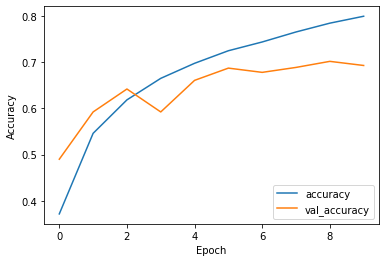

In [26]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
history = model.fit(x_train,y_train, epochs=10,batch_size=50,validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test loss is:",test_loss)
print("test accuracy is:",test_accuracy)

313/313 - 2s - loss: 1.0054 - accuracy: 0.6927
test loss is: 1.005365014076233
test accuracy is: 0.6927000284194946
